# Trigonometric fit using hyperopt and Linear Regression

https://github.com/fmfn/BayesianOptimization<br>
https://github.com/hyperopt/hyperopt

In [1]:
from hyperopt import hp, tpe, Trials, fmin
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from HybridSinCosFit import RegressionForTrigonometric
import time

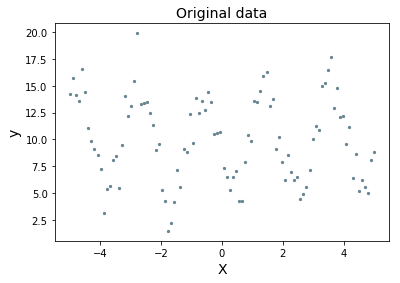

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

np.random.seed(12345)

n = 100
x_data = np.linspace(-5, 5, num= n)
y_data = 10 + 5 * np.cos(3 * x_data + 2) + 1.5 * np.random.normal(size=n)
plt.scatter(x_data, y_data,  label= 'observations', color= '#678491', s= 5)
plt.ylabel('y', fontsize= 14)
plt.xlabel('X', fontsize= 14)
plt.title('Original data', fontsize= 14);

In [3]:
# random split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


In [8]:
trig_reg = RegressionForTrigonometric()

start = time.time()
trig_reg.fit_cos(X_train, y_train, max_evals=500);
end = time.time()
print('Time:', end - start)


100%|███████████████████████████████████████████████| 1000/1000 [00:08<00:00, 113.79it/s, best loss: 7.476690663776648]
Time: 8.80113935470581


In [9]:
trig_reg.best_parameters

{'omega': 3.008407265071563,
 'phi': 1.9168350053143755,
 'intercept': 9.9842028563181469,
 'amplitude': 4.7405207225259272}

In [10]:
# Test data
from sklearn.metrics import mean_squared_error, r2_score

ypred = trig_reg.predict(X_test)

rmse = mean_squared_error(y_test,ypred)
r2 = r2_score(y_test,ypred)
print('mse:', rmse)
print('r2:',r2)

mse: 3.78597742792
r2: 0.836466327398


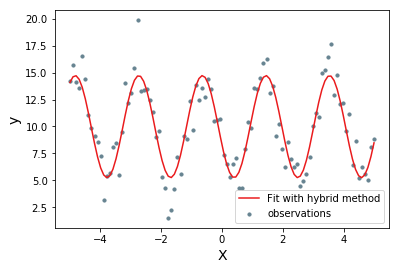

In [7]:
# Apply model to all data
y = trig_reg.predict(x_data)

# plot
fig, ax = plt.subplots()
ax.scatter(x_data, y_data, label='observations', color='#678491', s=10)
ax.plot(x_data, y, label='Fit with hybrid method', color '#EA1B1D')
ax.set_ylabel('y', fontsize=14)
ax.set_xlabel('X', fontsize=14)
plt.legend(loc='best')
#ax.set_title('Fit using Hybrid method', fontsize= 14)
plt.savefig('images/Hybrid.png', bbox_inches="tight")